In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
from testCases import *
%matplotlib inline
np.random.seed(1)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1]]


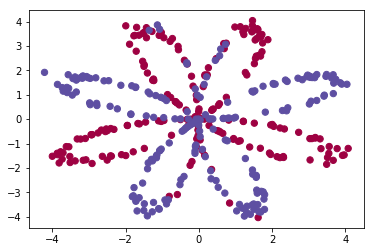

In [40]:
X, Y = load_planar_dataset()
'''
两个返回的结果一样,但是如果对ravel()的结果进行修改,也会影响到Y
print(Y.ravel())
print(Y.flatten())
X[0,:] -- 所有点的横坐标
X[1.:] --所有点的纵坐标
Y -- 所有点的颜色
'''
plt.scatter(X[0, :], X[1:, ], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)
print(Y)

In [15]:
shape_X = X.shape # 得出X的维度,维度是(2,400)，表示（横纵坐标，样本数）
shape_Y = Y.shape # 得出Y的维度,维度是(1,400)，表示（颜色标签，样本数）
m = Y.shape[1]  # 得出样本数量

print ('X的维度是: ' + str(shape_X))
print ('Y的维度: ' + str(shape_Y))
print ('训练样本的个数是：' + str(m))

X的维度是: (2, 400)
Y的维度: (1, 400)
训练样本的个数是：400


In [38]:
# LogisticRegressionCV()内部实现了一个单神经元网络
clf = sklearn.linear_model.LogisticRegression();
# 将数据集传入对象中进行训练,学习率和训练次数等超参数都有默认值
# 训练好之后,会将训练好的W和b参数保存在clf对象中,后面可以用这些参数进行预测
clf.fit(X.T, Y.T.ravel())

D:\dev-programs\Anaconda3-python3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

预测准确度是: 47%


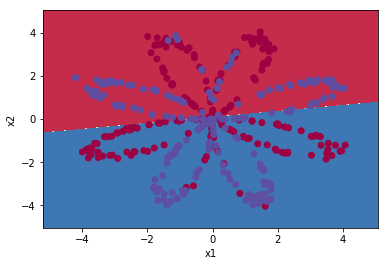

In [49]:
# 预测结果
LR_predictions = clf.predict(X.T)
# 所有值为1预测对的 + 所有值为0预测对的
# 或者用print(str(clf.score(X.T,Y.T.ravel()) * 100) + "%")内置函数
print("预测准确度是: %d" % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions)) / float(Y.size) * 100)+ "%")
plot_decision_boundary(lambda x:clf.predict(x),X,Y.ravel())

In [18]:
def initialize_parameters(n_x,n_h,n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros(shape=(n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros(shape=(n_y,1))
    
    parameters = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    return parameters


In [19]:
n_x,n_h,n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x,n_h,n_y)
# print("W1 = " + str(parameters["W1"]))
# print("b1 = " + str(parameters["b1"]))
# print("W2 = " + str(parameters["W2"]))
# print("b2 = " + str(parameters["b2"]))
# 
# print("--------------------------------------------")
# 
# print("nn dim(" + str(n_x) + "," + str(n_h) + "," + str(n_y) + ")");
# print("W1 dim:" + str(parameters["W1"].shape))
# print("b1 dim:" + str(parameters["b1"].shape))
# print("W2 dim:" + str(parameters["W2"].shape))
# print("b2 dim:" + str(parameters["b2"].shape))

In [20]:
def forward_propagation(X,parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }
    return A2,cache

In [21]:
X_assess,parameters = forward_propagation_test_case()
A2,cache = forward_propagation(X_assess,parameters)

print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

print("--------------------------------------------")

print("W1 dim:" + str(parameters["W1"].shape))
print("b1 dim:" + str(parameters["b1"].shape))
print("W2 dim:" + str(parameters["W2"].shape))
print("b2 dim:" + str(parameters["b2"].shape))

print("--------------------------------------------")

print("Z1 dim:" + str(cache['Z1'].shape))
print("A1 dim:" + str(cache['A1'].shape))
print("Z2 dim:" + str(cache['Z2'].shape))
print("A2 dim:" + str(cache['A2'].shape))

-0.0004997557777419902 -0.000496963353231779 0.00043818745095914653 0.500109546852431
--------------------------------------------
W1 dim:(4, 2)
b1 dim:(4, 1)
W2 dim:(1, 4)
b2 dim:(1, 1)
--------------------------------------------
Z1 dim:(4, 3)
A1 dim:(4, 3)
Z2 dim:(1, 3)
A2 dim:(1, 3)


In [22]:
def compute_cost(A2,Y,parameters):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2),Y) + np.multiply((1-Y),np.log(1-A2))
    cost = - np.sum(logprobs) / m
    return cost

In [23]:
A2,Y_assess,parameters = compute_cost_test_case()
print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761266


In [24]:
def backward_propagation(parameters,cache,X,Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) * np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T,dZ2),1-np.power(A1,2))
    dW1 = (1/m) * np.dot(dZ1,X.T)
    db1 = (1/m) * np.sum(dZ1,axis=1,keepdims=True)
    
    # print("W1 dim:" + str(W1.shape))
    # print("W2 dim:" + str(W2.shape))
    # print("------------------------------")
    #         
    # print("dZ2 dim:" + str(dZ2.shape))
    # print("dZ1 dim:" + str(dZ1.shape))
    # print("------------------------------")
            
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    #返回计算得到的梯度
    return grads    

In [25]:
parameters,cache,X_assess,Y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters,cache,X_assess,Y_assess)

print("dW1 dim:" + str(grads["dW1"].shape))
print("db1 dim:" + str(grads["db1"].shape))
print("dW2 dim:" + str(grads["dW2"].shape))
print("db2 dim:" + str(grads["db2"].shape))
print("------------------------------")

print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 dim:(4, 2)
db1 dim:(4, 1)
dW2 dim:(1, 4)
db2 dim:(1, 1)
------------------------------
dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [26]:
def update_parameters(parameters,grads,learning_rate=1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    return parameters
    

In [27]:
parameters,grads = update_parameters_test_case()
parameters = update_parameters(parameters,grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [28]:
def nn_model(X,Y,n_h,num_iterations=10000,print_cost=False):
    np.random.seed(3)
    
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    for i in range(0,num_iterations):
        A2,cache = forward_propagation(X,parameters)
        cost = compute_cost(A2,Y,parameters)
        grads = backward_propagation(parameters,cache,X,Y)
        parameters = update_parameters(parameters,grads)
        if print_cost and i % 1000 == 0:
            print("在训练%i次后,成本是: %f" % (i,cost))
        
    return parameters

In [29]:
X_assess,Y_assess = nn_model_test_case()
parameters = nn_model(X_assess,Y_assess,4,num_iterations=10000,print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

D:\dev-programs\Anaconda3-python3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


W1 = [[-4.18494482  5.33220319]
 [-7.52989354  1.24306197]
 [-4.19295428  5.32631786]
 [ 7.52983748 -1.24309404]]
b1 = [[ 2.32926815]
 [ 3.7945905 ]
 [ 2.33002544]
 [-3.79468791]]
W2 = [[-6033.83672179 -6008.12981272 -6033.10095329  6008.06636901]]
b2 = [[-52.66607704]]


In [30]:
def predict(parameters,X):
    A2,cache = forward_propagation(X,parameters)
    predictions = np.round(A2)
    
    return predictions

In [31]:
parameters,X_assess = predict_test_case()
predictions = predict(parameters,X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


在训练0次后,成本是: 0.693048
在训练1000次后,成本是: 0.288083
在训练2000次后,成本是: 0.254385
在训练3000次后,成本是: 0.233864
在训练4000次后,成本是: 0.226792
在训练5000次后,成本是: 0.222644
在训练6000次后,成本是: 0.219731
在训练7000次后,成本是: 0.217504
在训练8000次后,成本是: 0.219504
在训练9000次后,成本是: 0.218571
预测准确率是: 90%


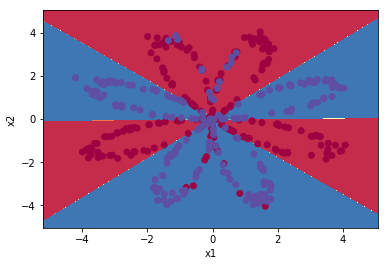

In [32]:
parameters = nn_model(X,Y,n_h=4,num_iterations=10000,print_cost=True)
predictions = predict(parameters,X)
print ('预测准确率是: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')
plot_decision_boundary(lambda x: predict(parameters,x.T),X,Y.ravel())

1个隐藏层神经元时的准确度是: 67.5 %
2个隐藏层神经元时的准确度是: 67.25 %
3个隐藏层神经元时的准确度是: 90.75 %
4个隐藏层神经元时的准确度是: 90.5 %
5个隐藏层神经元时的准确度是: 91.25 %
20个隐藏层神经元时的准确度是: 90.0 %
50个隐藏层神经元时的准确度是: 90.75 %


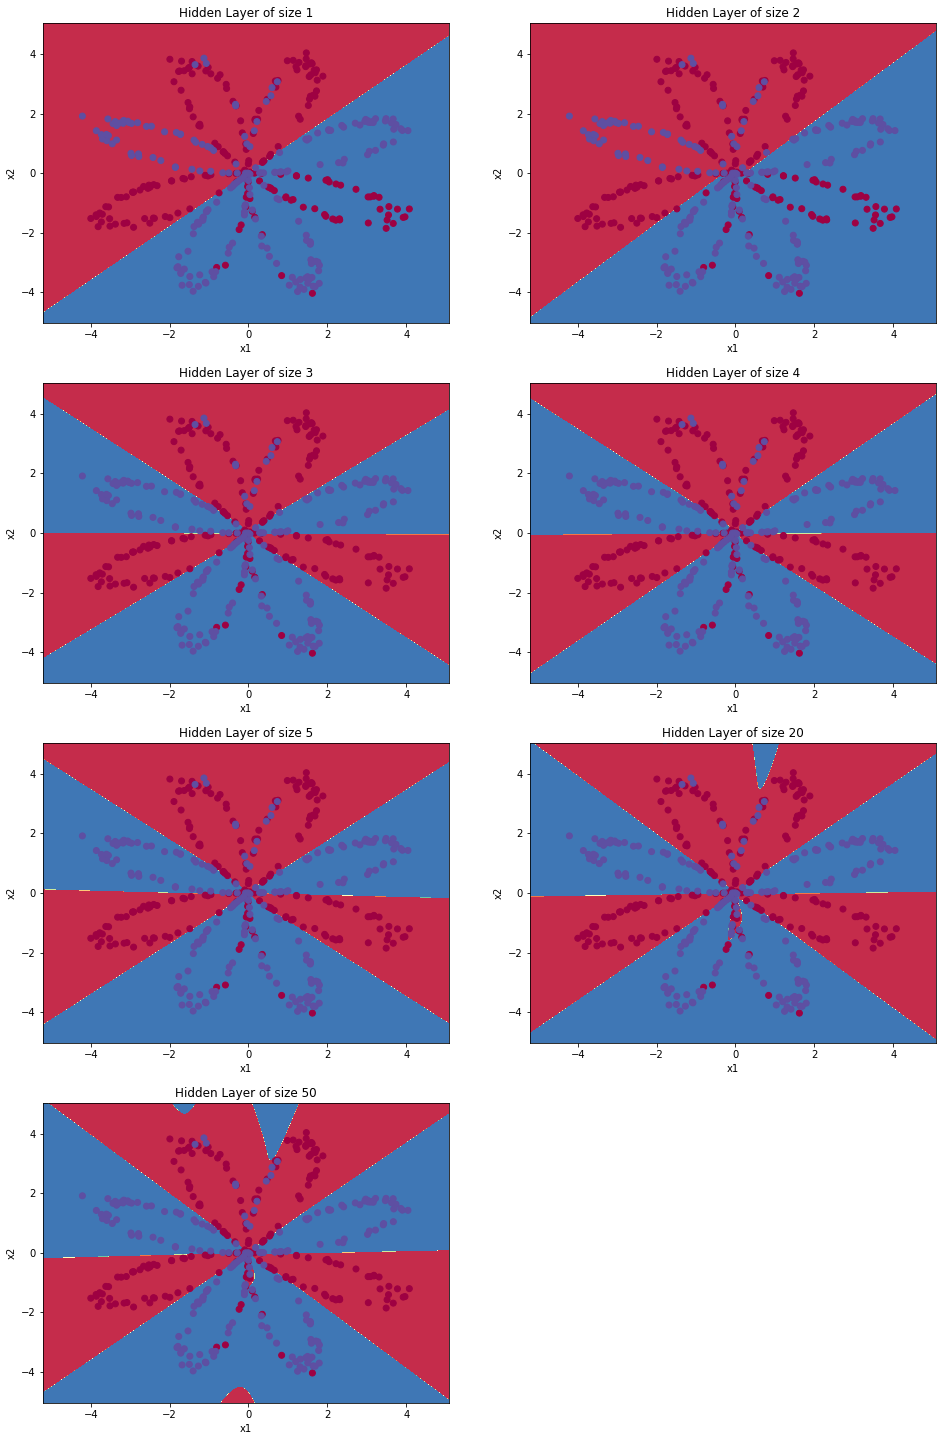

In [33]:
plt.figure(figsize=(16,32))
hidden_layer_sizes = [1,2,3,4,5,20,50]
for i,n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5,2,i+1)
    plt.title("Hidden Layer of size %d" % n_h)
    parameters = nn_model(X,Y,n_h,num_iterations=5000)
    plot_decision_boundary(lambda x:predict(parameters,x.T),X,Y.ravel())
    predictions = predict(parameters,X)
    accurancy = float(np.dot(Y,predictions.T) + np.dot(1 - Y,1-predictions.T)) / float(Y.size) * 100
    print("{}个隐藏层神经元时的准确度是: {} %".format(n_h,accurancy))